In [3]:
import os
import subprocess
import time
import numpy as np
from scipy.stats import wilcoxon, ttest_rel, linregress
import matplotlib.pyplot as plt

%matplotlib inline


INSTANCES_DIR = "instances/"
RESULTS_DIR = "results/"

def run_instance(infile, args, outfile=None):
    start = time.time()
    if not outfile:
        outfile = subprocess.PIPE
    else:
        outfile = open(RESULTS_DIR + outfile, "a")
    subprocess.call(["./lsscp", "--instance", INSTANCES_DIR + infile, *args], stdout=outfile)
    return time.time() - start
        
def run_all(args, outfile):
    try:
        os.remove(RESULTS_DIR + outfile)
    except FileNotFoundError:
        pass
    elapsed_time = 0
    for dir, dirs, files in os.walk(INSTANCES_DIR):
        for file in sorted(files):
            elapsed_time += run_instance(file, args, outfile)
    return elapsed_time

def mean_run_time(infile, args, n):
    total = 0
    for i in range(n):
        total += run_instance(infile, args)
    return total/n

def run_instance_with_ratio(infile, algo, outfile, ratio):
    mean_fi_time = mean_run_time(infile, ("--ch4", "--fi"), 25)
    return run_instance(infile, ("--" + algo, "--t", str(int(mean_fi_time * 1000 * ratio))), outfile)

def run_all_with_ratio(algo, outfile, ratio):
    try:
        os.remove(RESULTS_DIR + outfile)
    except FileNotFoundError:
        pass
    elapsed_time = 0
    for dir, dirs, files in os.walk(INSTANCES_DIR):
        for file in sorted(files):
            elapsed_time += run_instance_with_ratio(file, algo, outfile, ratio)
    return elapsed_time

optimal_instances = ["scpa1", "scpb1", "scpc1", "scpd1"]

def run_optimal(algo, ratio):
    outfile = algo + "_opt.txt"
    try:
        os.remove(RESULTS_DIR + outfile)
    except FileNotFoundError:
        pass
    for instance in optimal_instances:
        print(run_instance_with_ratio(instance + ".txt", algo, outfile, ratio))
    load_results()

def parse(file):
    with open(file) as f:
        return list(map(int, f.readlines()))
    
def load_results():
    for dir, dirs, files in os.walk(RESULTS_DIR):
        for file in files:
            name = file[:-4].replace("-", "_")
            globals()[name] = parse(dir + file)
        
def percentage_deviation(observed, best):    
    assert(len(observed) == len(best))
    return list(map(lambda x: (x[0] - x[1])/x[1], zip(observed, best)))

def average_percentage_deviation(observed, best):
    pd = percentage_deviation(observed, best)
    return sum(pd)/len(pd)

def relative_percentage_deviation(l1, l2):
    assert(len(l1) == len(l2))
    return list(map(lambda x: abs((x[0] - x[1])/((x[1] + x[0])/2)), zip(l1, l2)))

def fraction_positive(l):
    return len(list(filter(lambda x: x > 0, l)))/len(l)

def test_improvement(l1, l2):
    imp = percentage_deviation(l1, l2)
    print("Fraction of instances improved : ", fraction_positive(imp))
    imp = np.array(imp)
    print(imp.mean())
    print(imp.std())
    print(imp.max())
    print(imp.min())
    print(wilcoxon(l1, l2))
    print(ttest_rel(l1, l2))


In [4]:
print(run_all(("--ch1",), "ch1.txt"))
print(run_all(("--ch2",), "ch2.txt"))
print(run_all(("--ch3",), "ch3.txt"))
print(run_all(("--ch4",), "ch4.txt"))
print(run_all(("--ch1", "--re"), "ch1re.txt"))
print(run_all(("--ch2", "--re"), "ch2re.txt"))
print(run_all(("--ch3", "--re"), "ch3re.txt"))
print(run_all(("--ch4", "--re"), "ch4re.txt"))

1.0417859554290771
1.0291154384613037
1.0306289196014404
1.0595836639404297
2.8413240909576416
1.4516983032226562
1.4388606548309326
1.187140703201294


In [5]:
load_results()

In [6]:
print(average_percentage_deviation(ch1, best_known))
print(average_percentage_deviation(ch2, best_known))
print(average_percentage_deviation(ch3, best_known))
print(average_percentage_deviation(ch4, best_known))
print(average_percentage_deviation(ch1re, best_known))
print(average_percentage_deviation(ch2re, best_known))
print(average_percentage_deviation(ch3re, best_known))
print(average_percentage_deviation(ch4re, best_known))

35.29621653608673
0.27405351611183165
0.3016417317840776
0.1767634379498829
27.81905654265422
0.11592208166847057
0.14073851429349368
0.13197283301819474


In [7]:
nore = ch1 + ch2 + ch3 + ch4
withre = ch1re + ch2re + ch3re + ch4re
test_improvement(nore, withre)

Fraction of instances improved :  0.9798387096774194
0.147971704158
0.10057283968
0.470588235294
0.0
WilcoxonResult(statistic=0.0, pvalue=1.2814523415056763e-41)
Ttest_relResult(statistic=8.5580767136554723, pvalue=1.2346503830430528e-15)


In [8]:
print(run_all(("--ch1", "--fi"), "ch1fi.txt"))
print(run_all(("--ch4", "--fi"), "ch4fi.txt"))
print(run_all(("--ch1", "--re", "--fi"), "ch1refi.txt"))
print(run_all(("--ch4", "--re", "--fi"), "ch4refi.txt"))
print(run_all(("--ch1", "--bi"), "ch1bi.txt"))
print(run_all(("--ch4", "--bi"), "ch4bi.txt"))
print(run_all(("--ch1", "--re", "--bi"), "ch1rebi.txt"))
print(run_all(("--ch4", "--re", "--bi"), "ch4rebi.txt"))

3.266089916229248
1.318296194076538
3.6412405967712402
1.762923240661621
3.688572883605957
1.5852241516113281
3.5458974838256836
1.4930973052978516


In [9]:
load_results()

In [10]:
print(average_percentage_deviation(ch1fi, best_known))
print(average_percentage_deviation(ch1refi, best_known))
print(average_percentage_deviation(ch4fi, best_known))
print(average_percentage_deviation(ch4refi, best_known))
print(average_percentage_deviation(ch1bi, best_known))
print(average_percentage_deviation(ch1rebi, best_known))
print(average_percentage_deviation(ch4bi, best_known))
print(average_percentage_deviation(ch4rebi, best_known))

26.474933439065072
27.53480266030842
0.13006999602368838
0.12505620494919842
0.3316475551888148
26.957711390139718
0.08707997163917548
0.09924646850675854


In [11]:
nothing = ch1 + ch1re + ch4 + ch4re
withfi = ch1fi + ch1refi + ch4fi + ch4refi
withbi = ch1bi + ch1rebi + ch4bi + ch4rebi
test_improvement(nothing, withfi)
test_improvement(nothing, withbi)
test_improvement(withfi, withbi)

Fraction of instances improved :  0.6451612903225806
0.091904539658
0.13249853207
0.715223097113
0.0
WilcoxonResult(statistic=0.0, pvalue=5.1681488905994952e-28)
Ttest_relResult(statistic=8.6181952532634547, pvalue=8.252989893319208e-16)
Fraction of instances improved :  0.7258064516129032
7.56904281965
16.5287532326
73.4262295082
-0.117647058824
WilcoxonResult(statistic=33.0, pvalue=1.0266751909277341e-31)
Ttest_relResult(statistic=8.7035652188198576, pvalue=4.646515659184309e-16)
Fraction of instances improved :  0.6774193548387096
5.66356672141
12.2925930918
57.0
-0.117647058824
WilcoxonResult(statistic=71.0, pvalue=6.0141840973467213e-30)
Ttest_relResult(statistic=8.6721876373528417, pvalue=5.7407709530443916e-16)


In [13]:
print(run_all_with_ratio("ig", "ig.txt", 100))
print(run_all_with_ratio("gen", "gen.txt", 100))

162.76604533195496
1513.7594544887543


In [14]:
load_results()
print(average_percentage_deviation(ig, best_known))
print(average_percentage_deviation(gen, best_known))

0.08707997163917548
0.06391166853212994


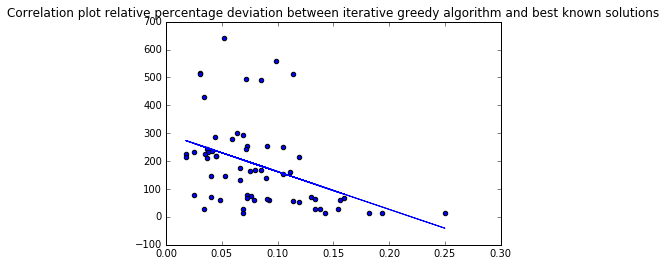

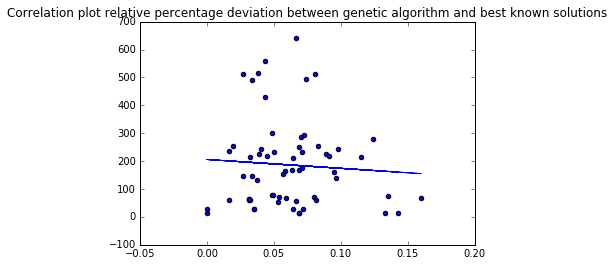

In [23]:
#plt.scatter(ig, best_known)
#plt.show()
#plt.scatter(gen, best_known)
#plt.show()
pderiv_ig = relative_percentage_deviation(ig, best_known)
pderiv_gen = relative_percentage_deviation(gen, best_known)
correlation = linregress(pderiv_ig, best_known)
plt.title("Correlation plot relative percentage deviation between iterative greedy algorithm and best known solutions")
plt.plot(pderiv_ig, np.array(pderiv_ig) * correlation.slope + correlation.intercept)
plt.scatter(pderiv_ig, best_known)
plt.show()
correlation = linregress(pderiv_gen, best_known)
plt.title("Correlation plot relative percentage deviation between genetic algorithm and best known solutions")
plt.plot(pderiv_gen, np.array(pderiv_gen) * correlation.slope + correlation.intercept)
plt.scatter(pderiv_gen, best_known)
plt.show()

In [16]:
print(wilcoxon(pderiv_ig, pderiv_gen))
print(ttest_rel(pderiv_ig, pderiv_gen))
print(wilcoxon(ig, best_known))
print(wilcoxon(gen, best_known))

WilcoxonResult(statistic=446.0, pvalue=0.0015218128402173954)
Ttest_relResult(statistic=3.4640503365351822, pvalue=0.00097927503490302702)
WilcoxonResult(statistic=0.0, pvalue=7.4474030892037171e-12)
WilcoxonResult(statistic=0.0, pvalue=1.5813760408905017e-11)


19.00484299659729
13.006156206130981
19.02070665359497
18.004141330718994
[257]
[74]
[238]
[61]

In [18]:
run_optimal("gen", 1000)
print(scpa1_gen_opt) # A.1 253 -> 258 -> 255
print(scpb1_gen_opt) # B.1 69 -> 71 -> 70
print(scpc1_gen_opt) # C.1 227 -> 231 -> 229
print(scpd1_gen_opt) # D.1 60 -> 61 -> 60

11.444749593734741
12.9664146900177
18.01086401939392
21.693324327468872
[258]
[78]
[234]
[61]


In [30]:
print(average_percentage_deviation(ig_opt, [253, 69, 227, 60]))
print(average_percentage_deviation(gen_opt, [253, 69, 227, 60]))
print(average_percentage_deviation(ig_opt, gen_opt))

0.0714794710173948
0.048324003296709675
0.02168807491910809


In [19]:
run_optimal("ig", 1000)
print(scpa1_ig_opt) # A.1 253 -> 258 -> 255
print(scpb1_ig_opt) # B.1 69 -> 71 -> 70
print(scpc1_ig_opt) # C.1 227 -> 231 -> 229
print(scpd1_ig_opt) # D.1 60 -> 61 -> 60

10.002309083938599
10.003480672836304
14.007994890213013
15.004057168960571
[272]
[81]
[235]
[63]


In [ ]:
18.00645875930786
15.004149198532104
20.091147422790527
19.00425124168396
[271]
[79]
[243]
[65]